In [88]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import optuna


from pycaret.classification import *
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelBinarizer

import seaborn as sns


In [89]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [90]:
ignore_cols = ['id']
dict_for_y = {'Class_1': 0.0, 'Class_2': 1.0, 'Class_3': 2.0, 'Class_4': 3.0}
train_df['target'] = train_df['target'].map(dict_for_y)

In [91]:
cols = [col for col in train_df.columns if col not in ['id', 'target']]

In [92]:
def feat_eng(data, cols):
    
    data['max_val'] = data[cols].max(axis=1) + 1
    data['sum_val'] = data[cols].sum(axis=1)
    data['mean_val'] = data[cols].mean(axis=1)
    data['std_val'] = data[cols].std(axis=1)
    data['median_val'] = data[cols].median(axis=1)
    data['skew_val'] = data[cols].skew(axis=1)
    data['kurt_val'] = data[cols].kurtosis(axis=1)
    data['count_one'] = (data[cols] == 1).sum(axis=1)
    data['count_two'] = (data[cols] == 2).sum(axis=1)
    data['count_three'] = (data[cols] == 3).sum(axis=1)
    data['count_four'] = (data[cols] == 4).sum(axis=1)
    data['count_five'] = (data[cols] == 5).sum(axis=1)
    data['count_over'] = (data[cols] >= 3).sum(axis=1)
    data['count_zero'] = (data[cols] == 0).sum(axis=1)
    data['count_one_ratio'] = data['count_one'] / data['max_val']
    data['count_two_ratio'] = data['count_two'] / data['max_val']
    data['count_three_ratio'] = data['count_three'] / data['max_val']
    data['count_four_ratio'] = data['count_four'] / data['max_val']
    data['count_five_ratio'] = data['count_five'] / data['max_val']
    data['count_zero_ratio'] = data['count_zero'] / data['max_val']


    return data

In [93]:
train_df = feat_eng(train_df, cols)

In [94]:
set = setup(data = train_df, 
            train_size = 0.8, 
            target = 'target', 
            ignore_features = ignore_cols, 
            use_gpu=True, 
            fold=5,
            )





[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

,Description,Value
0,Session id,7173
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(100000, 72)"
4,Transformed data shape,"(100000, 71)"
5,Transformed train set shape,"(80000, 71)"
6,Transformed test set shape,"(20000, 71)"
7,Ignore features,1
8,Numeric features,70
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

In [95]:
# compare_models()

In [96]:
lgbm_model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5776,0.5870,0.5776,0.4666,0.4397,0.0257,0.0673
1,0.5765,0.5872,0.5765,0.4383,0.4363,0.0210,0.0581
2,0.5793,0.5861,0.5793,0.5011,0.4401,0.0279,0.0762
3,0.5780,0.5845,0.5780,0.4850,0.4401,0.0270,0.0698
4,0.5779,0.5834,0.5779,0.4748,0.4391,0.0256,0.0681
Mean,0.5778,0.5856,0.5778,0.4731,0.4391,0.0254,0.0679
Std,0.0009,0.0015,0.0009,0.0209,0.0014,0.0024,0.0058


In [97]:
y_train_pred = predict_model(lgbm_model, data=train_df)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.5905,0.7070,0.5905,0.6836,0.4586,0.0580,0.1432


In [98]:
y_train_pred.columns

Index(['id', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24',
       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34',
       'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39',
       'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44',
       'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49',
       'max_val', 'sum_val', 'mean_val', 'std_val', 'median_val', 'skew_val',
       'kurt_val', 'count_one', 'count_two', 'count_three', 'count_four',
       'count_five', 'count_over', 'count_zero', 'count_one_ratio',
       'count_

<Axes: xlabel='prediction_label', ylabel='Count'>

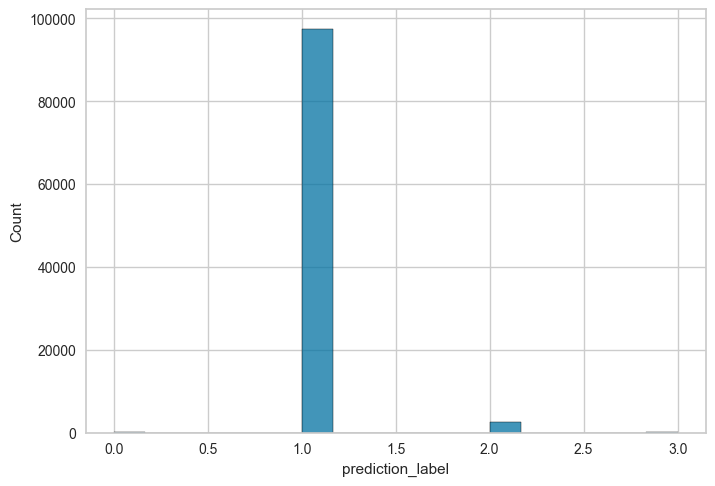

In [99]:
sns.histplot(y_train_pred['prediction_label'])

In [100]:
# y_true = y_train_pred['target']
# y_pred = y_train_pred['prediction_score']

# # 全クラスを指定してlog_lossを計算
# labels = [0, 1, 2, 3]
# loss = log_loss(y_true, y_pred, labels=labels)
# print(f'Log Loss: {loss}')

ValueError: The number of classes in labels is different from that in y_pred. Classes found in labels: [0 1 2 3]